In [1]:
from google.colab import drive

print("Menghubungkan ke Google Drive...")
drive.mount('/content/drive')
print("Google Drive berhasil terhubung.")

Menghubungkan ke Google Drive...
Mounted at /content/drive
Google Drive berhasil terhubung.


# Import Library

In [2]:
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Load Fitur Yang Sudah Diesktrak

In [3]:
load_dir = '/content/drive/MyDrive/bismillah/features'

train_features = np.load(os.path.join(load_dir, 'train_features.npy'))
train_labels = np.load(os.path.join(load_dir, 'train_labels.npy'))
test_features = np.load(os.path.join(load_dir, 'test_features.npy'))
test_labels = np.load(os.path.join(load_dir, 'test_labels.npy'))

print("Fitur berhasil dimuat:")
print("Train:", train_features.shape, train_labels.shape)
print("Test :", test_features.shape, test_labels.shape)

Fitur berhasil dimuat:
Train: (3072, 1000) (3072,)
Test : (96, 1000) (96,)


# Latih SVM Multikelas (One-vs-One) dengan Kernel RBF


Melatih SVM OvO (kernel RBF)...
Training selesai.
Runtime Training SVM: 2.60 detik

Evaluasi pada Data Latih:
Akurasi: 92.87109375 %
Runtime Prediksi Data Latih: 30.84 detik

Evaluasi pada Data Uji:
Akurasi: 92.70833333333334 %
Runtime Prediksi Data Uji: 0.88 detik

Confusion Matrix (Test Data):


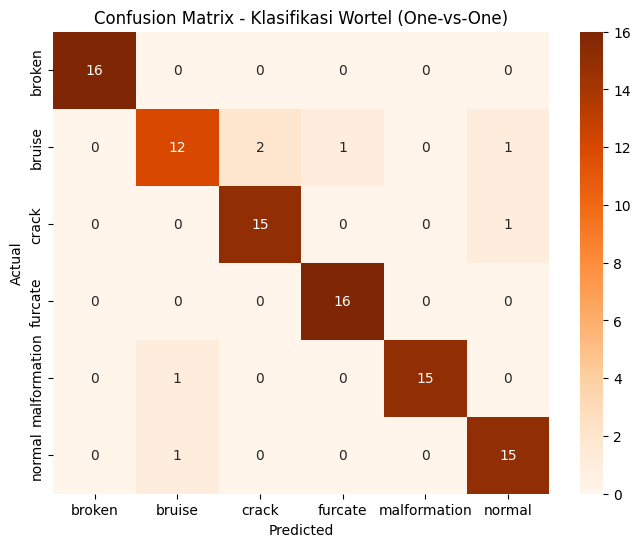


Laporan Klasifikasi (Test Data):
              precision    recall  f1-score   support

      broken       1.00      1.00      1.00        16
      bruise       0.86      0.75      0.80        16
       crack       0.88      0.94      0.91        16
     furcate       0.94      1.00      0.97        16
malformation       1.00      0.94      0.97        16
      normal       0.88      0.94      0.91        16

    accuracy                           0.93        96
   macro avg       0.93      0.93      0.93        96
weighted avg       0.93      0.93      0.93        96



In [11]:
# 3. LATIH SVM MULTICLASS (OvO) + Hitung Waktu
print("\nMelatih SVM OvO (kernel RBF)...")
start_train = time.time()
svm = OneVsOneClassifier(SVC(kernel='rbf', C=1.0))
svm.fit(train_features, train_labels)
end_train = time.time()
print("Training selesai.")
print(f"Runtime Training SVM: {end_train - start_train:.2f} detik")

# 4. EVALUASI
print("\nEvaluasi pada Data Latih:")
start_pred_train = time.time()
train_preds = svm.predict(train_features)
end_pred_train = time.time()
print("Akurasi:", accuracy_score(train_labels, train_preds) * 100, "%")
print(f"Runtime Prediksi Data Latih: {end_pred_train - start_pred_train:.2f} detik")

print("\nEvaluasi pada Data Uji:")
start_pred_test = time.time()
test_preds = svm.predict(test_features)
end_pred_test = time.time()
print("Akurasi:", accuracy_score(test_labels, test_preds) * 100, "%")
print(f"Runtime Prediksi Data Uji: {end_pred_test - start_pred_test:.2f} detik")

# 5. CONFUSION MATRIX
print("\nConfusion Matrix (Test Data):")
class_names = ['broken', 'bruise', 'crack', 'furcate', 'malformation', 'normal']  # label wortelmu
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Klasifikasi Wortel (One-vs-One)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. CLASSIFICATION REPORT
print("\nLaporan Klasifikasi (Test Data):")
print(classification_report(test_labels, test_preds, target_names=class_names))

# Latih SVM Multikelas (One-vs-One) dengan Kernel Poly


Melatih SVM OvO (kernel Poly)...
Training selesai.
Runtime Training SVM: 2.04 detik

Evaluasi pada Data Latih:
Akurasi: 97.68880208333334 %
Runtime Prediksi Data Latih: 11.02 detik

Evaluasi pada Data Uji:
Akurasi: 93.75 %
Runtime Prediksi Data Uji: 0.35 detik

Confusion Matrix (Test Data):


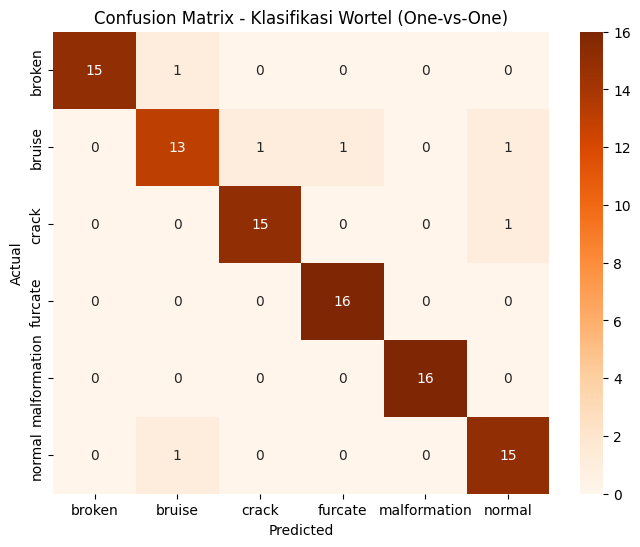


Laporan Klasifikasi (Test Data):
              precision    recall  f1-score   support

      broken       1.00      0.94      0.97        16
      bruise       0.87      0.81      0.84        16
       crack       0.94      0.94      0.94        16
     furcate       0.94      1.00      0.97        16
malformation       1.00      1.00      1.00        16
      normal       0.88      0.94      0.91        16

    accuracy                           0.94        96
   macro avg       0.94      0.94      0.94        96
weighted avg       0.94      0.94      0.94        96



In [12]:
# 3. LATIH SVM MULTICLASS (OvO) + Hitung Waktu
print("\nMelatih SVM OvO (kernel Poly)...")
start_train = time.time()
svm = OneVsOneClassifier(SVC(kernel='poly', C=1.0))
svm.fit(train_features, train_labels)
end_train = time.time()
print("Training selesai.")
print(f"Runtime Training SVM: {end_train - start_train:.2f} detik")

# 4. EVALUASI
print("\nEvaluasi pada Data Latih:")
start_pred_train = time.time()
train_preds = svm.predict(train_features)
end_pred_train = time.time()
print("Akurasi:", accuracy_score(train_labels, train_preds) * 100, "%")
print(f"Runtime Prediksi Data Latih: {end_pred_train - start_pred_train:.2f} detik")

print("\nEvaluasi pada Data Uji:")
start_pred_test = time.time()
test_preds = svm.predict(test_features)
end_pred_test = time.time()
print("Akurasi:", accuracy_score(test_labels, test_preds) * 100, "%")
print(f"Runtime Prediksi Data Uji: {end_pred_test - start_pred_test:.2f} detik")

# 5. CONFUSION MATRIX
print("\nConfusion Matrix (Test Data):")
class_names = ['broken', 'bruise', 'crack', 'furcate', 'malformation', 'normal']  # label wortelmu
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Klasifikasi Wortel (One-vs-One)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. CLASSIFICATION REPORT
print("\nLaporan Klasifikasi (Test Data):")
print(classification_report(test_labels, test_preds, target_names=class_names))

# Latih SVM Multikelas (One-vs-One) dengan Kernel Linear


Melatih SVM OvO (kernel Linear)...
Training selesai.
Runtime Training SVM: 1.60 detik

Evaluasi pada Data Latih:
Akurasi: 100.0 %
Runtime Prediksi Data Latih: 8.26 detik

Evaluasi pada Data Uji:
Akurasi: 84.375 %
Runtime Prediksi Data Uji: 0.22 detik

Confusion Matrix (Test Data):


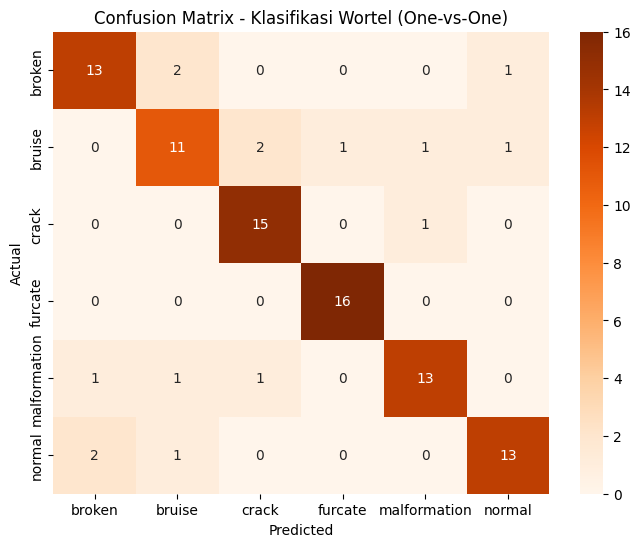


Laporan Klasifikasi (Test Data):
              precision    recall  f1-score   support

      broken       0.81      0.81      0.81        16
      bruise       0.73      0.69      0.71        16
       crack       0.83      0.94      0.88        16
     furcate       0.94      1.00      0.97        16
malformation       0.87      0.81      0.84        16
      normal       0.87      0.81      0.84        16

    accuracy                           0.84        96
   macro avg       0.84      0.84      0.84        96
weighted avg       0.84      0.84      0.84        96



In [13]:
# 3. LATIH SVM MULTICLASS (OvO) + Hitung Waktu
print("\nMelatih SVM OvO (kernel Linear)...")
start_train = time.time()
svm = OneVsOneClassifier(SVC(kernel='linear', C=1.0))
svm.fit(train_features, train_labels)
end_train = time.time()
print("Training selesai.")
print(f"Runtime Training SVM: {end_train - start_train:.2f} detik")

# 4. EVALUASI
print("\nEvaluasi pada Data Latih:")
start_pred_train = time.time()
train_preds = svm.predict(train_features)
end_pred_train = time.time()
print("Akurasi:", accuracy_score(train_labels, train_preds) * 100, "%")
print(f"Runtime Prediksi Data Latih: {end_pred_train - start_pred_train:.2f} detik")

print("\nEvaluasi pada Data Uji:")
start_pred_test = time.time()
test_preds = svm.predict(test_features)
end_pred_test = time.time()
print("Akurasi:", accuracy_score(test_labels, test_preds) * 100, "%")
print(f"Runtime Prediksi Data Uji: {end_pred_test - start_pred_test:.2f} detik")

# 5. CONFUSION MATRIX
print("\nConfusion Matrix (Test Data):")
class_names = ['broken', 'bruise', 'crack', 'furcate', 'malformation', 'normal']  # label wortelmu
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Klasifikasi Wortel (One-vs-One)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. CLASSIFICATION REPORT
print("\nLaporan Klasifikasi (Test Data):")
print(classification_report(test_labels, test_preds, target_names=class_names))

# Latih SVM Multikelas (One-vs-Rest) dengan Kernel RBF


Melatih SVM OvR (kernel RBF)...
Training selesai.
Runtime Training SVM: 9.32 detik

Evaluasi pada Data Latih:
Akurasi: 93.5546875 %
Runtime Prediksi Data Latih: 13.19 detik

Evaluasi pada Data Uji:
Akurasi: 96.875 %
Runtime Prediksi Data Uji: 0.37 detik

Confusion Matrix (Test Data):


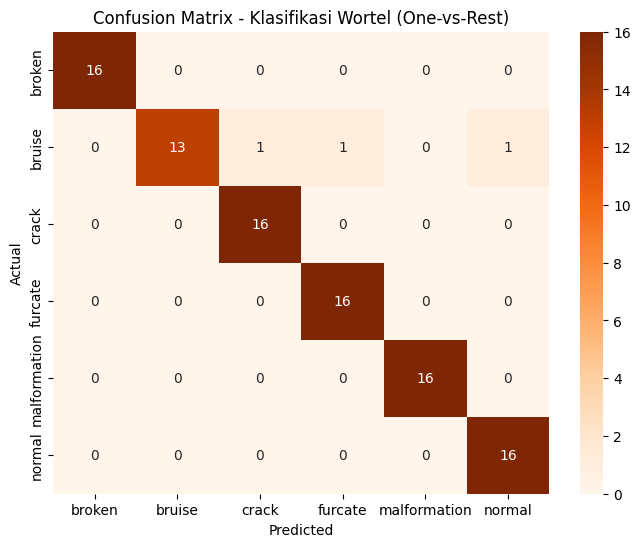


Laporan Klasifikasi (Test Data):
              precision    recall  f1-score   support

      broken       1.00      1.00      1.00        16
      bruise       1.00      0.81      0.90        16
       crack       0.94      1.00      0.97        16
     furcate       0.94      1.00      0.97        16
malformation       1.00      1.00      1.00        16
      normal       0.94      1.00      0.97        16

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96



In [14]:
# 3. LATIH SVM MULTICLASS (OvR) + Hitung Waktu
print("\nMelatih SVM OvR (kernel RBF)...")
start_train = time.time()
svm = OneVsRestClassifier(SVC(kernel='rbf', C=1.0))
svm.fit(train_features, train_labels)
end_train = time.time()
print("Training selesai.")
print(f"Runtime Training SVM: {end_train - start_train:.2f} detik")

# 4. EVALUASI
print("\nEvaluasi pada Data Latih:")
start_pred_train = time.time()
train_preds = svm.predict(train_features)
end_pred_train = time.time()
print("Akurasi:", accuracy_score(train_labels, train_preds) * 100, "%")
print(f"Runtime Prediksi Data Latih: {end_pred_train - start_pred_train:.2f} detik")

print("\nEvaluasi pada Data Uji:")
start_pred_test = time.time()
test_preds = svm.predict(test_features)
end_pred_test = time.time()
print("Akurasi:", accuracy_score(test_labels, test_preds) * 100, "%")
print(f"Runtime Prediksi Data Uji: {end_pred_test - start_pred_test:.2f} detik")

# 5. CONFUSION MATRIX
print("\nConfusion Matrix (Test Data):")
class_names = ['broken', 'bruise', 'crack', 'furcate', 'malformation', 'normal']  # label wortelmu
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Klasifikasi Wortel (One-vs-Rest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. CLASSIFICATION REPORT
print("\nLaporan Klasifikasi (Test Data):")
print(classification_report(test_labels, test_preds, target_names=class_names))

# Latih SVM Multikelas (One-vs-Rest) dengan Kernel Poly


Melatih SVM OvR (kernel Poly)...
Training selesai.
Runtime Training SVM: 6.69 detik

Evaluasi pada Data Latih:
Akurasi: 97.72135416666666 %
Runtime Prediksi Data Latih: 4.95 detik

Evaluasi pada Data Uji:
Akurasi: 90.625 %
Runtime Prediksi Data Uji: 0.16 detik

Confusion Matrix (Test Data):


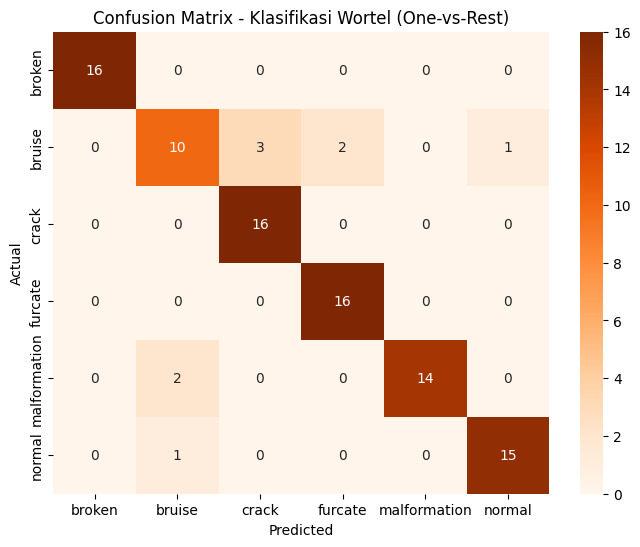


Laporan Klasifikasi (Test Data):
              precision    recall  f1-score   support

      broken       1.00      1.00      1.00        16
      bruise       0.77      0.62      0.69        16
       crack       0.84      1.00      0.91        16
     furcate       0.89      1.00      0.94        16
malformation       1.00      0.88      0.93        16
      normal       0.94      0.94      0.94        16

    accuracy                           0.91        96
   macro avg       0.91      0.91      0.90        96
weighted avg       0.91      0.91      0.90        96



In [15]:
# 3. LATIH SVM MULTICLASS (OvR) + Hitung Waktu
print("\nMelatih SVM OvR (kernel Poly)...")
start_train = time.time()
svm = OneVsRestClassifier(SVC(kernel='poly', C=1.0))
svm.fit(train_features, train_labels)
end_train = time.time()
print("Training selesai.")
print(f"Runtime Training SVM: {end_train - start_train:.2f} detik")

# 4. EVALUASI
print("\nEvaluasi pada Data Latih:")
start_pred_train = time.time()
train_preds = svm.predict(train_features)
end_pred_train = time.time()
print("Akurasi:", accuracy_score(train_labels, train_preds) * 100, "%")
print(f"Runtime Prediksi Data Latih: {end_pred_train - start_pred_train:.2f} detik")

print("\nEvaluasi pada Data Uji:")
start_pred_test = time.time()
test_preds = svm.predict(test_features)
end_pred_test = time.time()
print("Akurasi:", accuracy_score(test_labels, test_preds) * 100, "%")
print(f"Runtime Prediksi Data Uji: {end_pred_test - start_pred_test:.2f} detik")

# 5. CONFUSION MATRIX
print("\nConfusion Matrix (Test Data):")
class_names = ['broken', 'bruise', 'crack', 'furcate', 'malformation', 'normal']  # label wortelmu
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Klasifikasi Wortel (One-vs-Rest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. CLASSIFICATION REPORT
print("\nLaporan Klasifikasi (Test Data):")
print(classification_report(test_labels, test_preds, target_names=class_names))

# Latih SVM Multikelas (One-vs-Rest) dengan Kernel Linear


Melatih SVM OvR (kernel Linear)...
Training selesai.
Runtime Training SVM: 5.29 detik

Evaluasi pada Data Latih:
Akurasi: 99.86979166666666 %
Runtime Prediksi Data Latih: 3.26 detik

Evaluasi pada Data Uji:
Akurasi: 80.20833333333334 %
Runtime Prediksi Data Uji: 0.12 detik

Confusion Matrix (Test Data):


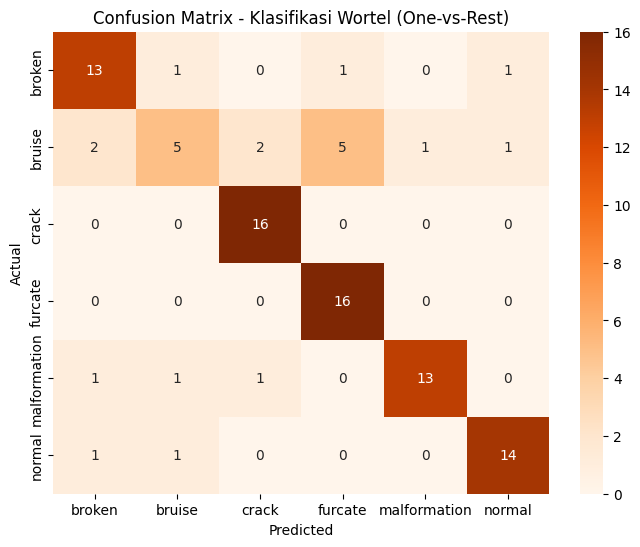


Laporan Klasifikasi (Test Data):
              precision    recall  f1-score   support

      broken       0.76      0.81      0.79        16
      bruise       0.62      0.31      0.42        16
       crack       0.84      1.00      0.91        16
     furcate       0.73      1.00      0.84        16
malformation       0.93      0.81      0.87        16
      normal       0.88      0.88      0.88        16

    accuracy                           0.80        96
   macro avg       0.79      0.80      0.78        96
weighted avg       0.79      0.80      0.78        96



In [16]:
# 3. LATIH SVM MULTICLASS (OvR) + Hitung Waktu
print("\nMelatih SVM OvR (kernel Linear)...")
start_train = time.time()
svm = OneVsRestClassifier(SVC(kernel='linear', C=1.0))
svm.fit(train_features, train_labels)
end_train = time.time()
print("Training selesai.")
print(f"Runtime Training SVM: {end_train - start_train:.2f} detik")

# 4. EVALUASI
print("\nEvaluasi pada Data Latih:")
start_pred_train = time.time()
train_preds = svm.predict(train_features)
end_pred_train = time.time()
print("Akurasi:", accuracy_score(train_labels, train_preds) * 100, "%")
print(f"Runtime Prediksi Data Latih: {end_pred_train - start_pred_train:.2f} detik")

print("\nEvaluasi pada Data Uji:")
start_pred_test = time.time()
test_preds = svm.predict(test_features)
end_pred_test = time.time()
print("Akurasi:", accuracy_score(test_labels, test_preds) * 100, "%")
print(f"Runtime Prediksi Data Uji: {end_pred_test - start_pred_test:.2f} detik")

# 5. CONFUSION MATRIX
print("\nConfusion Matrix (Test Data):")
class_names = ['broken', 'bruise', 'crack', 'furcate', 'malformation', 'normal']  # label wortelmu
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Klasifikasi Wortel (One-vs-Rest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. CLASSIFICATION REPORT
print("\nLaporan Klasifikasi (Test Data):")
print(classification_report(test_labels, test_preds, target_names=class_names))

### Kesimpulan

Berdasarkan hasil pengujian model klasifikasi menggunakan CNN dengan model pralatih MobileNetV2 dan SVM multikelas dengan metode One-vs-One (OvO) dan One-vs-Rest (OvR) serta dengan variasi kernel RBF, polinomial, dan linear, diperoleh hasil terbaik dari masing-masing metode. **Metode OvR menggunakan kernel RBF menunjukkan akurasi pengujian tertinggi yaitu 96,8%**, yang sedikit lebih baik dibandingkan OvO dengan kernel polinomial yang memiliki akurasi pengujian sebesar 93,7%. Di samping itu, OvR dengan kernel RBF juga mencatatkan nilai precision, recall, dan F1-score yang sedikit lebih baik, yaitu 97%, 96,8%, dan 96,6%. Namun, hal ini diikuti dengan waktu pelatihan yang lebih tinggi, yaitu 7,29 detik, dibandingkan pendekatan OvO dengan kernel polinomial yang hanya membutuhkan 2,62 detik. Meski demikian, waktu pengujian dari kedua pendekatan relatif sama, yaitu sebesar 0,35 detik, sehingga tidak berdampak signifikan terhadap efisiensi saat prediksi dilakukan. Dengan demikian, **metode OvR dengan kernel RBF dapat dianggap lebih unggul secara keseluruhan dalam hal akurasi dan stabilitas evaluasi**, meskipun memerlukan komputasi pelatihan yang lebih besar.